## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [4]:
import numpy as np
#import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
from keras.datasets import fashion_mnist

In [6]:
(train_imagef,train_labelf),(test_imagef,test_labelf)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


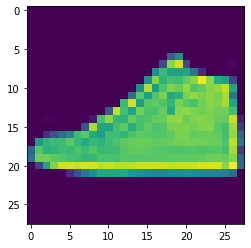

In [7]:
plt.imshow(train_imagef[1501,:,:])
plt.show()

In [8]:
train_labelf[:7]

array([9, 0, 0, 3, 0, 2, 7], dtype=uint8)

In [9]:
# Normalize the images.
train_imagef = (train_imagef / 127) - 1
test_imagef = (test_imagef / 127) - 1

In [10]:
# Flatten the images.
train_imagef = train_imagef.reshape((-1, 784))
test_imagef = test_imagef.reshape((-1, 784))

print(train_imagef.shape) # (60000, 784)
print(test_imagef.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [11]:
y_t = to_categorical(train_labelf)
y_tt = to_categorical(test_labelf)

In [26]:
results = {
    'neuron_numb': [],
    'epochs_numb': [],
    'layers_numb': [],
    'accuracy': [],
    'val_accuracy': [],
    'optimizer': [],
}

In [13]:
# Кол-во нейронов в исходящем слое равно кол-ву классов
my_set = set(train_labelf)
my_set

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [73]:
def create_fit_model(results, layers_numb, epochs_numb, neuron_numb_list):
  # Build the model.
  # neuron_numb_list = []
  model = Sequential(name='my_model')
  model.add(Dense(128, activation='relu', input_shape=(784,)))
  for k in range(layers_numb):
    # neuron_numb = 20+(10-k)*10
    # neuron_numb_list.append(neuron_numb)
    neuron_numb = neuron_numb_list[k]
    print(f'Слой {k} кол-во нейронов {neuron_numb}')
    model.add(Dense(neuron_numb, activation='tanh'))

  model.add(Dense(10, activation='softmax')) 

  # Compile the model.
  model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
  )

  # Train the model.
  hh = model.fit(  
    train_imagef[:,:],
    y_t[:,:],
    epochs=epochs_numb,
    batch_size=32, validation_split=0.2
  )

  # Evaluate the model.
  model.evaluate( 
    test_imagef,
    y_tt
  )

  results['neuron_numb'].append(neuron_numb_list)
  results['epochs_numb'].append(epochs_numb)
  results['layers_numb'].append(layers_numb)
  results['optimizer'].append('adam')
  results['accuracy'].append(hh.history['accuracy'][-1])
  results['val_accuracy'].append(hh.history['val_accuracy'][-1])
  return hh, model

In [28]:
create_fit_model(results, 2, 15, [110, 100])
create_fit_model(results, 2, 15, [130, 120])
create_fit_model(results, 2, 15, [140, 130])
create_fit_model(results, 2, 15, [50, 40])
create_fit_model(results, 2, 15, [75, 65])

Слой 0 кол-во нейронов 120
Слой 1 кол-во нейронов 110
Epoch 1/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6226 - accuracy: 0.7752 - val_loss: 0.4015 - val_accuracy: 0.8536
Epoch 2/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3887 - accuracy: 0.8562 - val_loss: 0.3867 - val_accuracy: 0.8638
Epoch 3/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3461 - accuracy: 0.8729 - val_loss: 0.3728 - val_accuracy: 0.8654
Epoch 4/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3282 - accuracy: 0.8800 - val_loss: 0.3646 - val_accuracy: 0.8646
Epoch 5/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3051 - accuracy: 0.8868 - val_loss: 0.3474 - val_accuracy: 0.8760
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2920 - accuracy: 0.8912 - val_loss: 0.3545 - val_accuracy: 0.8768
Epoch 7/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2783

In [43]:
create_fit_model(results, 3, 15, [110, 100, 90])
create_fit_model(results, 5, 15, [110, 100, 90, 80, 70])
create_fit_model(results, 10, 15, [110, 100, 90, 80, 70, 60, 50, 40, 30, 20])

Слой 0 кол-во нейронов 110
Слой 1 кол-во нейронов 100
Слой 2 кол-во нейронов 90
Слой 3 кол-во нейронов 80
Слой 4 кол-во нейронов 70
Epoch 1/15
1500/1500 [==============================] - 6s 3ms/step - loss: 0.6531 - accuracy: 0.7723 - val_loss: 0.4473 - val_accuracy: 0.8389
Epoch 2/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4229 - accuracy: 0.8469 - val_loss: 0.3864 - val_accuracy: 0.8641
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3770 - accuracy: 0.8651 - val_loss: 0.4133 - val_accuracy: 0.8477
Epoch 4/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3591 - accuracy: 0.8704 - val_loss: 0.4157 - val_accuracy: 0.8482
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3346 - accuracy: 0.8767 - val_loss: 0.3591 - val_accuracy: 0.8699
Epoch 6/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3205 - accuracy: 0.8825 - val_loss: 0.3539 - val_accuracy: 0.8751
Epoc

In [79]:
df_res_models = pd.DataFrame(data=results)
df_res_models

,neuron_numb,epochs_numb,layers_numb,accuracy,val_accuracy,optimizer
0,"[120, 110]",15,2,0.922521,0.883750,adam
1,"[130, 120]",15,2,0.921167,0.884500,adam
2,"[140, 130]",15,2,0.922854,0.884833,adam
3,"[50, 40]",15,2,0.915750,0.889833,adam
4,"[75, 65]",15,2,0.917917,0.881083,adam
5,"[110, 100]",15,2,0.919771,0.885917,adam
6,"[50, 40]",15,2,0.913667,0.880500,adam
7,"[110, 100, 90]",15,3,0.913646,0.882083,adam
8,"[110, 100, 90, 80, 70]",15,5,0.906000,0.884917,adam
9,"[110, 100, 90, 80, 70, 60, 50, 40, 30, 20]",15,10,0.891250,0.875417,adam


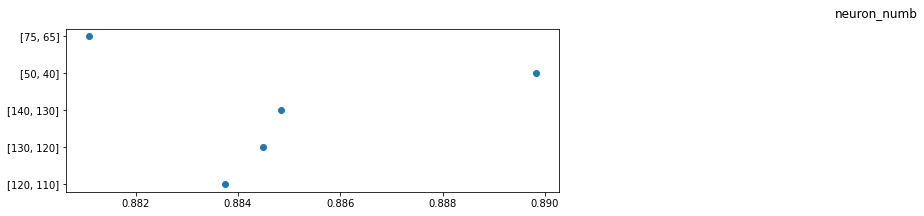

In [80]:
names = [f'{val}' for val in results['neuron_numb'][:5]]
values = results['val_accuracy'][:5]

plt.figure(figsize=(30, 3))

plt.subplot(131)
plt.scatter(values, names)
plt.suptitle('neuron_numb')
plt.show()

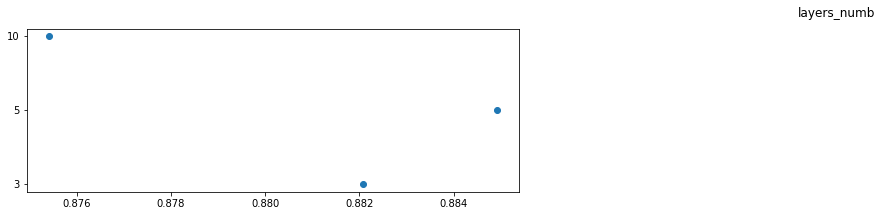

In [66]:
names = [f'{val}' for val in results['layers_numb'][7:]]
values = results['val_accuracy'][7:]

plt.figure(figsize=(30, 3))

plt.subplot(131)
plt.scatter(values, names)
plt.suptitle('layers_numb')
plt.show()

Слой 0 кол-во нейронов 150
Слой 1 кол-во нейронов 140
Epoch 1/30
1500/1500 [==============================] - 6s 3ms/step - loss: 0.6217 - accuracy: 0.7760 - val_loss: 0.4206 - val_accuracy: 0.8444
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3872 - accuracy: 0.8575 - val_loss: 0.3666 - val_accuracy: 0.8650
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3425 - accuracy: 0.8741 - val_loss: 0.3586 - val_accuracy: 0.8733
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3163 - accuracy: 0.8819 - val_loss: 0.3560 - val_accuracy: 0.8709
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3033 - accuracy: 0.8871 - val_loss: 0.3474 - val_accuracy: 0.8742
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2864 - accuracy: 0.8929 - val_loss: 0.3301 - val_accuracy: 0.8821
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2734

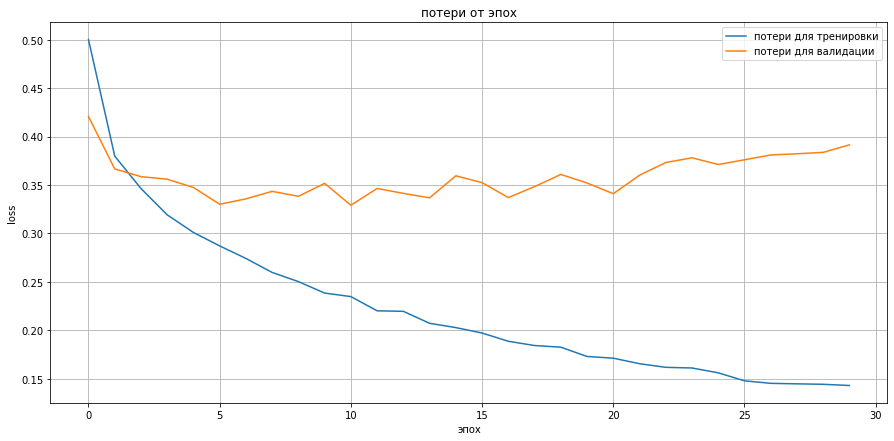

In [77]:
# Проверка
hh, model = create_fit_model(results, 2, 30, [150, 140])
plt.figure(figsize=(15,7))
plt.plot(hh.history['loss'], label = 'потери для тренировки')
plt.plot(hh.history['val_loss'], label = 'потери для валидации')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('потери от эпох')
plt.show()

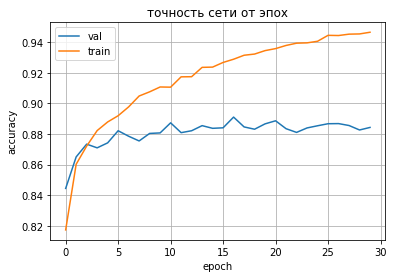

In [78]:
plt.plot(hh.history['val_accuracy'] ,label='val')
plt.plot(hh.history['accuracy'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

#Ответ:
По таблице и графикам можно сделать обманчивые выводы, рез-ты требуется перепроверять на графиках.

1.1 Оптимальной по val_accuracy оказалась модель с 110 на 100 нейронов в 2х скрытых слоях.

1.2 Увеличение кол-ва слоев при том же количестве эпох только ухудшает рез-ты модели, как и при решении первого ДЗ напрашивается вывод что увеличивать нужно параллельно и кол-во эпох.

Особого преимущества от величения эпох до 30 и увеличения нейронов я не заметил.

In [82]:
hh = model.fit(
  train_imagef,
  y_t,
  epochs=3,
  batch_size=1024, validation_split=0.2
)

Epoch 1/3
47/47 [==============================] - 1s 7ms/step - loss: 0.1095 - accuracy: 0.9604 - val_loss: 0.3656 - val_accuracy: 0.8911
Epoch 2/3
47/47 [==============================] - 0s 7ms/step - loss: 0.0875 - accuracy: 0.9702 - val_loss: 0.3661 - val_accuracy: 0.8926
Epoch 3/3
47/47 [==============================] - 0s 7ms/step - loss: 0.0805 - accuracy: 0.9733 - val_loss: 0.3682 - val_accuracy: 0.8929


In [83]:
# Predict on the first 5 test images.
predictions = model.predict(test_imagef[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1))

# Check our predictions against the ground truths.
print(test_labelf[:5]) #

[9 2 1 1 6]
[9 2 1 1 6]


Сохраним модель на диск

In [84]:
# сохранить веса модели.
model.save_weights('model.h5')

# загрузить веса модели:
# model.load_weights('model.h5')

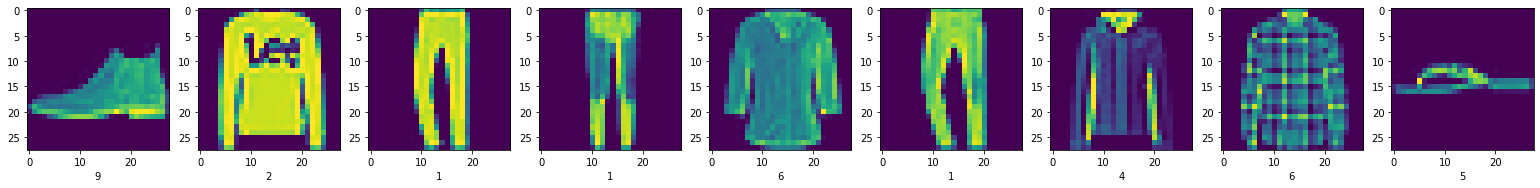

In [85]:
N = 9
y_pred = model.predict(test_imagef[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_imagef[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show() 

In [86]:
test_labelf[:N]

array([9, 2, 1, 1, 6, 1, 4, 6, 5], dtype=uint8)